In [1]:
import data_smoothing
import find_peaks
import peak_character

# Load TA data

In [2]:
data_nm, data_time, data_z = data_smoothing.load_data_csv('exp03_20180103 -t0 -chirp.csv', 900, 1400, 1)

# Smooth data

In [3]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


# Find Peaks

In [4]:
threshold = 0
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [5]:
idx.describe()

,0,1,2
count,666.000000,186.000000,7.000000
mean,46.749249,72.010753,123.142857
std,16.018463,33.538198,6.202918
min,6.000000,42.000000,118.000000
25%,53.000000,51.000000,118.500000
50%,56.000000,53.000000,119.000000
75%,56.000000,119.000000,128.000000
max,59.000000,135.000000,132.000000


In [6]:
height.describe()

,0,1,2
count,666.000000,186.000000,7.000000
mean,-0.001437,-0.000950,-0.000214
std,0.000475,0.000559,0.000165
min,-0.003789,-0.001443,-0.000393
25%,-0.001411,-0.001320,-0.000330
50%,-0.001318,-0.001255,-0.000258
75%,-0.001217,-0.000160,-0.000102
max,-0.000230,0.000071,0.000017


# Classify Peaks - KMeans

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def data_grouping(index_df, height_df, fwhm_df):
    peak_list = []
    
    for i in range(index_df.shape[0]):
        for j in range(index_df.shape[1]):
            peak_list.append(
            [index_df.loc[i,j], height_df.loc[i,j], fwhm_df.loc[i,j], i])
        
    all_points = pd.DataFrame(peak_list, 
    columns=['Position', 'Height', 'Width', 'Time'])
    fill_na = all_points.fillna(value=0)
    corrected_output = fill_na.drop(fill_na[abs(fill_na.Height) < 0.0002].index)
    corrected_output = corrected_output.reset_index(drop=True)
    
    return corrected_output

def cluster_classifier(index_df, corrected_output):
    found_peak = index_df.shape[1]
    cluster = KMeans(n_clusters=found_peak).fit(corrected_output.iloc[:,:-2])
    print(cluster.labels_)
    print(cluster.cluster_centers_)
    cluster_dict = {}
    
    for i in range(found_peak):
            cluster_dict['peak_%s' % i] = []
            
    for j in range(corrected_output.shape[0]):
        peak = cluster.predict([corrected_output.values[j,:-2]])
        for k in range(found_peak):
            if (peak == k):
                cluster_dict['peak_%s' % k].append(corrected_output.values[j])
                #print('found a match')

    peak_dict = { k:v for k, v in cluster_dict.items() if len(v) >= 5}
    return peak_dict

In [6]:
corrected_output = data_grouping(idx, height, fwhm)
corrected_output.describe()

,Position,Height,Width,Time
count,807.00000,807.000000,807.000000,807.00000
mean,48.10285,-0.001404,174.902382,291.45601
std,15.97301,0.000446,39.606767,199.12853
min,6.00000,-0.003789,83.450000,0.00000
25%,51.00000,-0.001396,161.760000,109.00000
50%,55.00000,-0.001311,165.260000,267.00000
75%,56.00000,-0.001220,182.363000,466.50000
max,125.00000,-0.000210,350.989000,665.00000


In [9]:
corrected_output

,Position,Height,Width,Time
0,17.0,-0.003516,89.092,0
1,17.0,-0.003728,85.662,1
2,17.0,-0.003561,85.662,2
3,17.0,-0.003659,85.662,3
4,16.0,-0.003789,85.662,4
5,17.0,-0.003537,85.662,5
6,17.0,-0.003514,89.092,6
7,17.0,-0.003445,89.092,7
8,17.0,-0.003270,89.092,8
9,17.0,-0.003209,89.092,9


In [7]:
peak_dict = cluster_classifier(idx, corrected_output)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 2 0 1 2 0 1
 0 2 0 0 0 0 1 0 1 0 1 2 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# convert dictionary to a data frame

In [8]:
def dict_to_pd(dict_item, nm):
    nm_pd = pd.DataFrame(data_nm)
    #convert index to nm
    nm_list = []
    df = pd.DataFrame(dict_item, 
    columns=['Position', 'Height', 'Width', 'Time'])         
    df = df.drop_duplicates(subset= 'Time')
    df = df.reset_index(drop=True)
    for j in df['Position']:
        nm_list.append(nm_pd.loc[j].values[0])
        
    df['Position'] = nm_list
    
    return df

# Use peak 0

In [22]:
df_1 = dict_to_pd(peak_dict['peak_0'], data_nm)

In [68]:
df_2 = dict_to_pd(peak_dict['peak_1'], data_nm)

# Fit functions

In [10]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.special import gamma

def abs_data(data):
    abs_array = np.abs(data)
    
    return abs_array

def singleexpfunc(t, params):
    exp_array = params[0] *np.exp((-1.0/params[1]) * t)

    return exp_array

def fit_single_exp_diffev(t, data):
    a1_bounds = (0, 1)
    tau1_bounds = (0, 100)
    bounds = [a1_bounds, tau1_bounds]
    time_array = t
    data_array = abs_data(data)
    def fit(params):
        decaymodel = singleexpfunc(time_array, params[:])
        cost = np.sum(((data_array - decaymodel) ** 2.0))
        return cost
    bestfit = differential_evolution(fit, bounds = bounds, polish = True)
    bestfit_params = bestfit.x
    def bestfit_decay(params):
        decaymodel = singleexpfunc(time_array, params[:])
        return decaymodel    
    bestfit_model = bestfit_decay(bestfit_params)   
    
    ss_res = np.sum((data_array - bestfit_model) ** 2.0)
    ss_tot = np.sum((data_array - np.mean(data_array)) ** 2.0)
    rsquare = 1 - (ss_res / ss_tot)
    
    return bestfit_params, bestfit_model, data_array, time_array

In [23]:
time_idx = np.array(df_1['Time'])
time = np.empty_like(time_idx)
for i in range(len(time_idx)):
    time[i] = data_time[int(time_idx[i])]

In [70]:
df_1['Time'] = time

In [71]:
time_idx_2 = np.array(df_2['Time'])
time_2 = np.empty_like(time_idx_2)
for i in range(len(time_idx_2)):
    time_2[i] = data_time[int(time_idx_2[i])]
df_2['Time'] = time_2

In [72]:
pos_idx = np.array(df_1['Position'])
pos_nm = np.empty_like(pos_idx)
for i in range(len(pos_idx)):
    pos_nm[i] = data_nm[int(pos_idx[i])]

IndexError: index 959 is out of bounds for axis 0 with size 144

In [ ]:
    fs = 20
    fit_exp = fit_single_exp_diffev(df['Time'], df['Height'])
    bf = fit_exp[1]
    bf_params = fit_exp[0]
    
    #add best-fit to dataframe
    #multiply by -1 because previous data 
    #was taken absolute value
    df['Fit'] = -1*bf
    
    #plot peak position, intensity and width over time
    fig, ax1 = plt.subplots(figsize=(8, 3), dpi=500)
    
    
    ax1.plot(df_1['Time'], df['Height'], '.', label = 'Data', color = '#4b2e83', markersize=12)
    ax1.plot(df_1['Time'], df['Fit'], label = 'Mono-exponential fit', color = 'black',linewidth=4)
    x_pos = 2
    y_pos = -0.001
    plt.annotate('Life-time' + ' = ' + '%.1f' %(bf_params[1]) + ' ps', (x_pos, y_pos), fontsize=fs)
    
    ax1.set_title('Peak Dynamics', fontsize=fs, fontweight='bold')
    ax1.set_ylabel('Intensity', fontsize=fs, fontweight='bold')
    ax1.set_xlabel('Time (ps)', fontsize=fs, fontweight='bold')
    ax1_yticks = [-0.0035, -0.003, -0.0025, -0.002, -0.0015, -0.001, -0.0005, 0, 0.0005]
    ax1_xticks = np.arange(0, 18, 2)
    ax1.set_xticklabels(ax1_xticks, fontsize = fs-2)
    ax1.set_yticklabels(ax1_yticks, fontsize = fs-2)
    ax1.set_xlim((0, 15))
    
    ax1.legend(loc='lower right', fontsize=15, edgecolor = 'black')
        
    plt.show()

In [66]:
def fitting_vis(df, data_nm):
    import matplotlib.pyplot as plt
    """fit peak intensity array to monoexponential,
    then visualize peak intensity overlaid with best-fit, 
    height and fwhm dynamics
    
    Args:
        peak_dict: dictionary of peak index, height and fwhm
        data_nm: wavelength array
    
    """

    fs = 20
    fit_exp = fit_single_exp_diffev(df['Time'], df['Height'])
    bf = fit_exp[1]
    bf_params = fit_exp[0]
    
    #add best-fit to dataframe
    #multiply by -1 because previous data 
    #was taken absolute value
    df['Fit'] = -1*bf
    
    #plot peak position, intensity and width over time
    fig, ax1 = plt.subplots(figsize=(8, 3), dpi=500)
    
    
    ax1.plot(df_1['Time'], df['Height'], '.', label = 'Data', color = '#4b2e83', markersize=12)
    ax1.plot(df_1['Time'], df['Fit'], label = 'Mono-exponential fit', color = 'black',linewidth=4)
    x_pos = 2
    y_pos = -0.001
    plt.annotate('Life-time' + ' = ' + '%.1f' %(bf_params[1]) + ' ps', (x_pos, y_pos), fontsize=fs)
    
    ax1.set_title('Peak Dynamics', fontsize=fs, fontweight='bold')
    ax1.set_ylabel('Intensity', fontsize=fs, fontweight='bold')
    ax1.set_xlabel('Time (ps)', fontsize=fs, fontweight='bold')
    ax1_yticks = [-0.0035, -0.003, -0.0025, -0.002, -0.0015, -0.001, -0.0005, 0, 0.0005]
    ax1_xticks = np.arange(0, 18, 2)
    ax1.set_xticklabels(ax1_xticks, fontsize = fs-2)
    ax1.set_yticklabels(ax1_yticks, fontsize = fs-2)
    ax1.set_xlim((0, 15))
    
    ax1.legend(loc='lower right', fontsize=15, edgecolor = 'black')
        
    plt.show()
        
    return

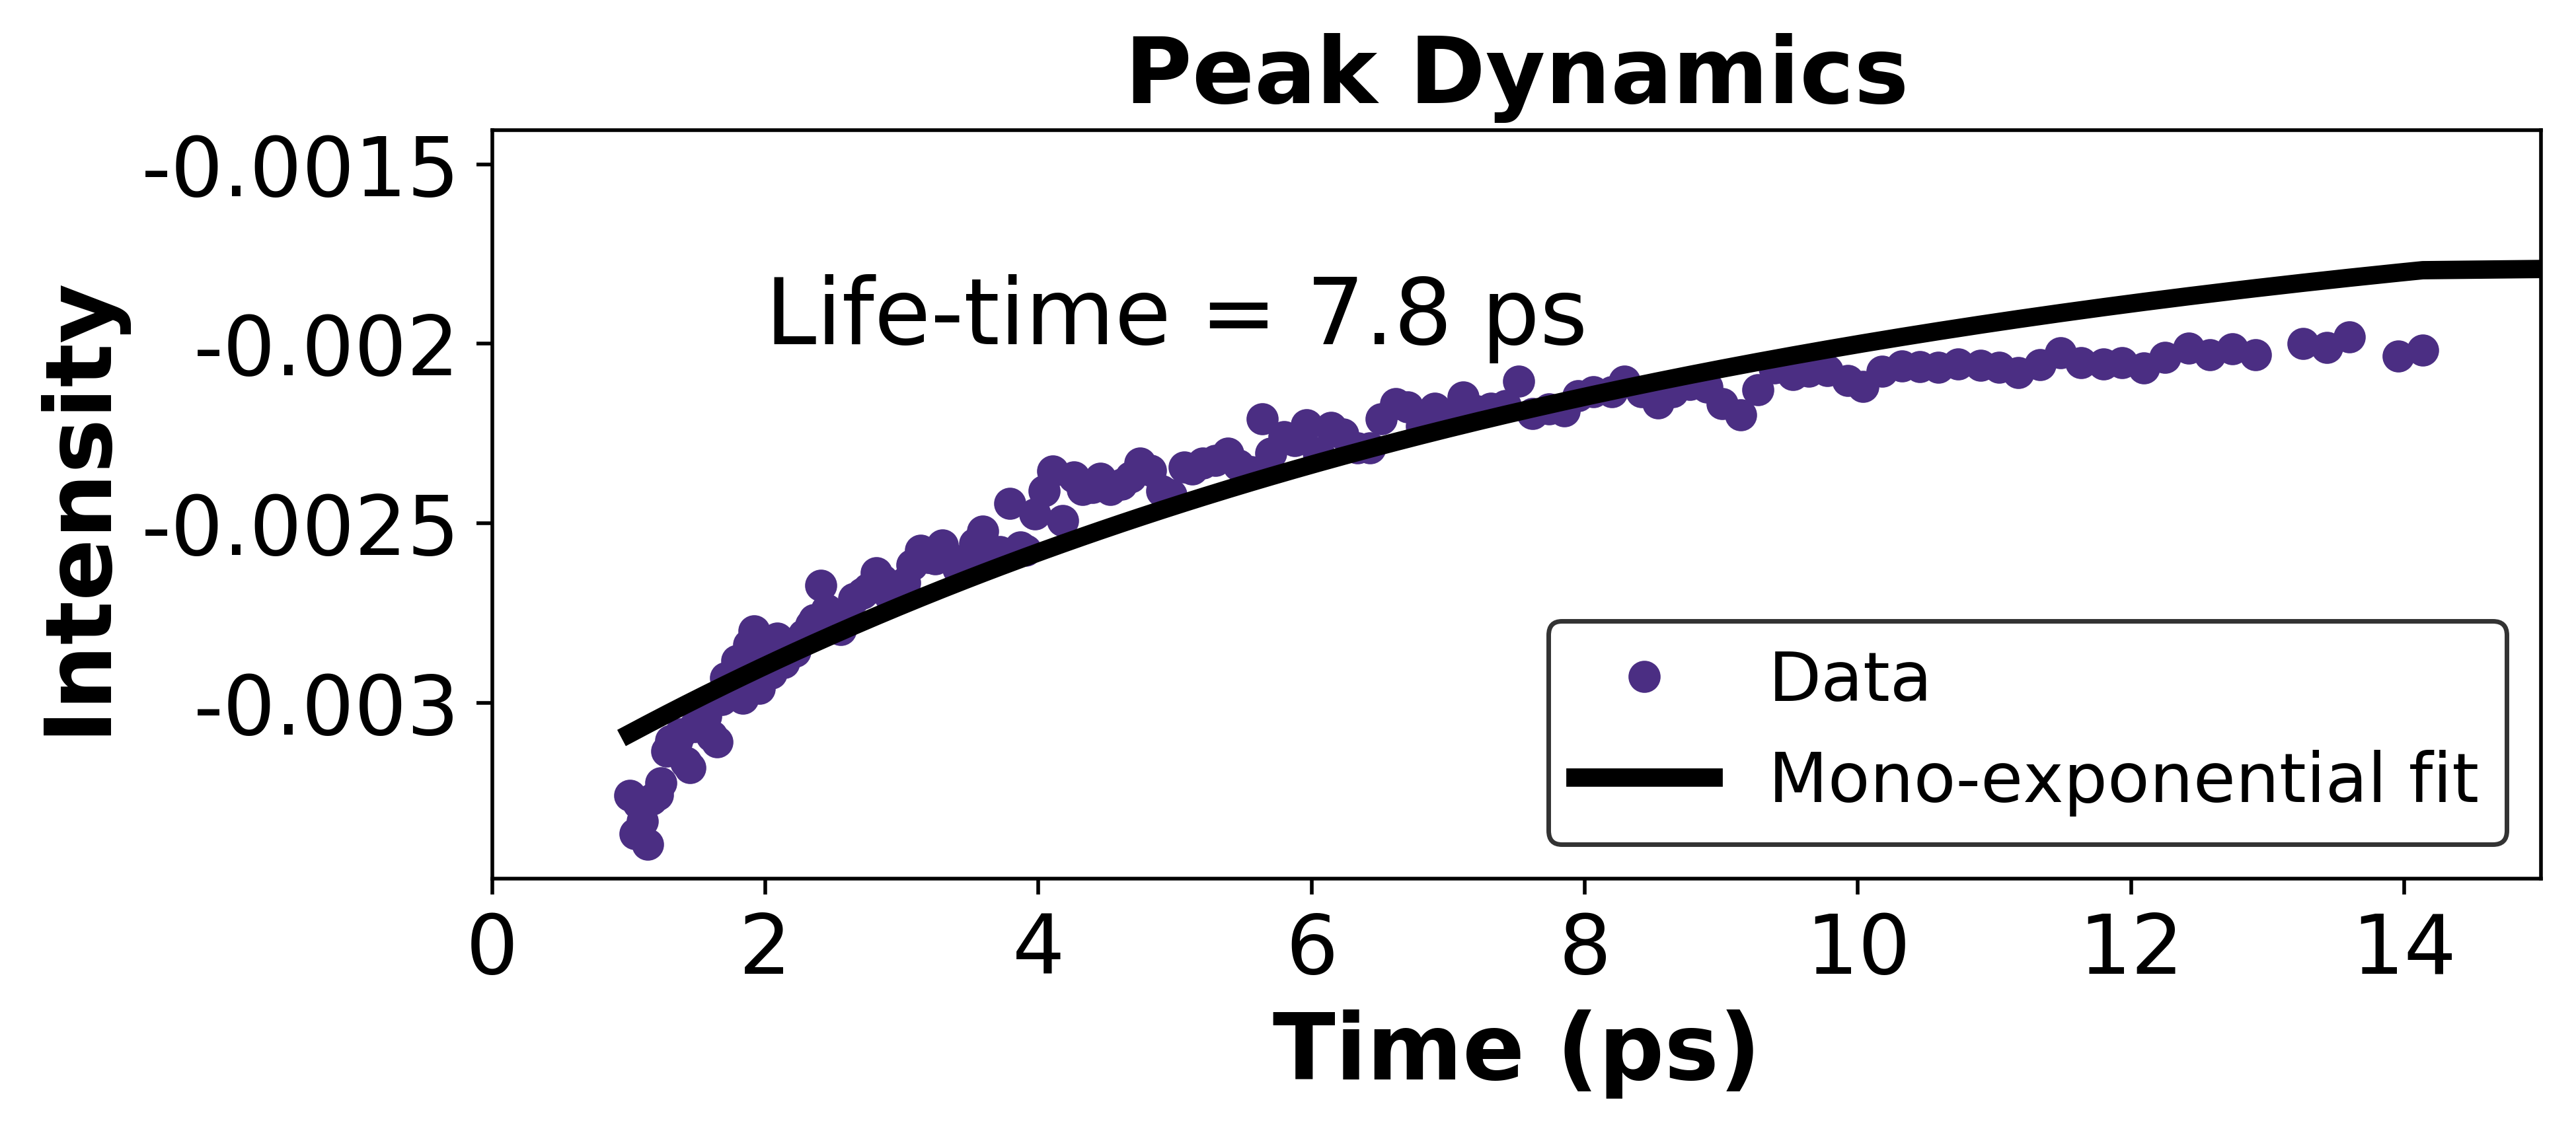

In [67]:
fitting_vis(df_1, data_nm)

In [21]:
df_1['Height']

0     -0.003516
1     -0.003728
2     -0.003561
3     -0.003659
4     -0.003789
5     -0.003537
6     -0.003514
7     -0.003445
8     -0.003270
9     -0.003209
10    -0.003214
11    -0.003174
12    -0.003333
13    -0.003363
14    -0.003133
15    -0.003027
16    -0.003076
17    -0.003184
18    -0.003220
19    -0.002984
20    -0.002860
21    -0.002906
22    -0.002764
23    -0.002974
24    -0.002677
25    -0.002601
26    -0.002920
27    -0.002733
28    -0.002835
29    -0.002639
         ...   
127   -0.001238
128   -0.001153
129   -0.001123
130   -0.001128
131   -0.001133
132   -0.001112
133   -0.001122
134   -0.001132
135   -0.001162
136   -0.001117
137   -0.001052
138   -0.001105
139   -0.001112
140   -0.001106
141   -0.001136
142   -0.001075
143   -0.001024
144   -0.001061
145   -0.001027
146   -0.001062
147   -0.000998
148   -0.001022
149   -0.000963
150   -0.001069
151   -0.001036
152   -0.000259
153   -0.000297
154   -0.000291
155   -0.000230
156   -0.000333
Name: Height, Length: 15

In [51]:
def save_df(df,filename):
    df.to_csv(filename, sep = ',', columns=['Position', 'Height', 'Width', 'Time', 'Fit']) 
    return